In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [2]:
postulantes_gen_edad = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv',low_memory=False)

In [3]:
postulantes_gen_edad.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
postulantes_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [5]:
postulantes_gen_edad['fechanacimiento'].isnull().any()

True

In [6]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad.dropna(subset=['fechanacimiento'])

quite las filas que poseen algun NaN de la columna fechanacimiento.

In [7]:
postulantes_gen_edad_sin_NaN['fechanacimiento'].isnull().any()

False

In [8]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.reset_index(drop=True)

In [9]:
postulantes_gen_edad_copia = postulantes_gen_edad_sin_NaN.copy()

In [10]:
postulantes_gen_edad_copia['fechanacimiento']=postulantes_gen_edad_copia['fechanacimiento'].str.split("-")  

In [11]:
postulantes_gen_edad_sin_NaN.shape

(196138, 3)

In [12]:
for i in range(0,postulantes_gen_edad_copia.shape[0]):
    #print(postulantes_gen_edad_sin_NaN['fechanacimiento'][i][0])
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][0]) < 1678 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) < 0 or int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) > 12 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    if (int(postulantes_gen_edad_copia['fechanacimiento'][i][2]) < 0 or int(postulantes_gen_edad_copia['fechanacimiento'][i][1]) > 31 ):
        postulantes_gen_edad_sin_NaN.drop(i, inplace=True)
        continue
    
    

Aca lo que se hizo fue quitar las filas que contienen un año,mes o dia invalido..

In [13]:
postulantes_gen_edad_sin_NaN.shape

(196131, 3)

In [14]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.reset_index(drop=True)

In [15]:
postulantes_gen_edad_sin_NaN.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [16]:
postulantes_gen_edad_sin_NaN['fechanacimiento'] = pd.to_datetime(postulantes_gen_edad_sin_NaN['fechanacimiento'])

In [17]:
now = pd.Timestamp(datetime.datetime.now())  

In [18]:
postulantes_gen_edad_sin_NaN['age'] = (now - postulantes_gen_edad_sin_NaN['fechanacimiento']).astype('timedelta64[Y]').astype(int)

In [19]:
postulantes_gen_edad_sin_NaN.head(5)

,idpostulante,fechanacimiento,sexo,age
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37


In [20]:
postulantes_gen_edad_sin_NaN = postulantes_gen_edad_sin_NaN.sort_values(by='age',ascending=False)

Text(0,0.5,'Cantidad de postulantes')

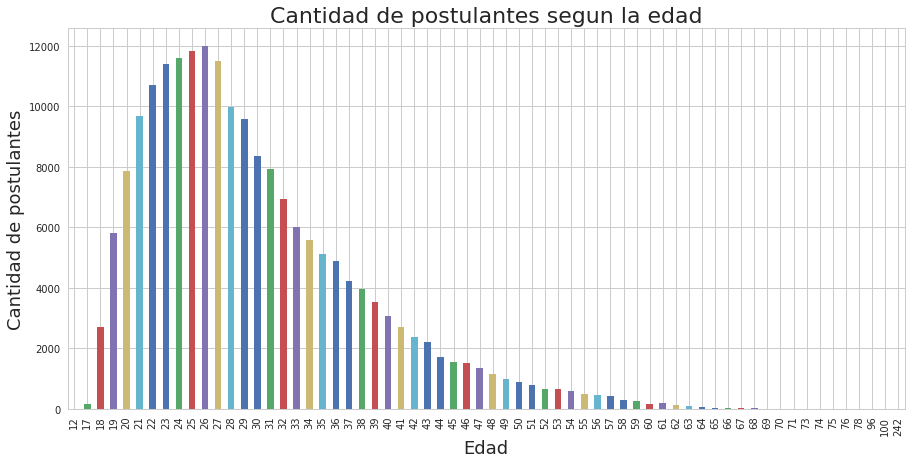

In [21]:
g = postulantes_gen_edad_sin_NaN['age'].value_counts().sort_index(ascending=True).plot.bar(figsize=(15,7))
g.set_title("Cantidad de postulantes segun la edad", fontsize=22)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

Se ve que hay algunas personas con edades que no corresponderían.. 12,100 y 242 años...

In [22]:
postulaciones = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_4_postulaciones.csv',low_memory=False)

In [23]:
postulaciones.shape

(3401623, 3)

In [24]:
postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])].shape

(3357121, 3)

lo que hice con "postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])]"
es filtrar en postulaciones por todos los id que tenga que coincidan en postulaciones_edad

In [25]:
post_validas = postulaciones.loc[postulaciones['idpostulante'].isin(postulantes_gen_edad_sin_NaN['idpostulante'])]

In [26]:
df_b = postulantes_gen_edad_sin_NaN.copy()

In [27]:
post_validas = pd.merge(post_validas, df_b, on='idpostulante', how='inner')

In [28]:
fechas_validas = post_validas.copy()

In [29]:
del post_validas['fechanacimiento']

In [30]:
del post_validas['sexo']

In [31]:
post_validas.shape

(3357121, 4)

In [32]:
df_a = post_validas.loc[post_validas['age'] == 26]

In [33]:
df_a.head(4)

,idaviso,idpostulante,fechapostulacion,age
12361,1112247023,NZKzML,2018-01-16 16:01:51,26
12362,1112278961,NZKzML,2018-01-26 18:04:05,26
12363,1112293412,NZKzML,2018-01-26 18:05:16,26
12364,1112294610,NZKzML,2018-01-29 15:09:46,26


In [34]:
avisos_det = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_6_avisos_detalle.csv',low_memory=False)

In [35]:
prueba = pd.merge(df_a, avisos_det[['idaviso','nombre_area']], on='idaviso', how='inner')

In [36]:
prueba.head(4)

,idaviso,idpostulante,fechapostulacion,age,nombre_area
0,1112247023,NZKzML,2018-01-16 16:01:51,26,Recursos Humanos
1,1112247023,eAB6a9,2018-01-22 20:13:44,26,Recursos Humanos
2,1112247023,5mrOlpM,2018-01-27 11:26:21,26,Recursos Humanos
3,1112247023,xkPZ23Y,2018-02-02 08:00:32,26,Recursos Humanos


In [37]:
prueba_fin = prueba.groupby('nombre_area').size().sort_values(ascending=False)

In [38]:
prueba_fin.head(10)

nombre_area
Ventas                      26084
Administración              20870
Producción                  19182
Comercial                   13856
Atención al Cliente         12954
Recepcionista                9733
Call Center                  7531
Tesorería                    5394
Telemarketing                4875
Mantenimiento y Limpieza     3863
dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

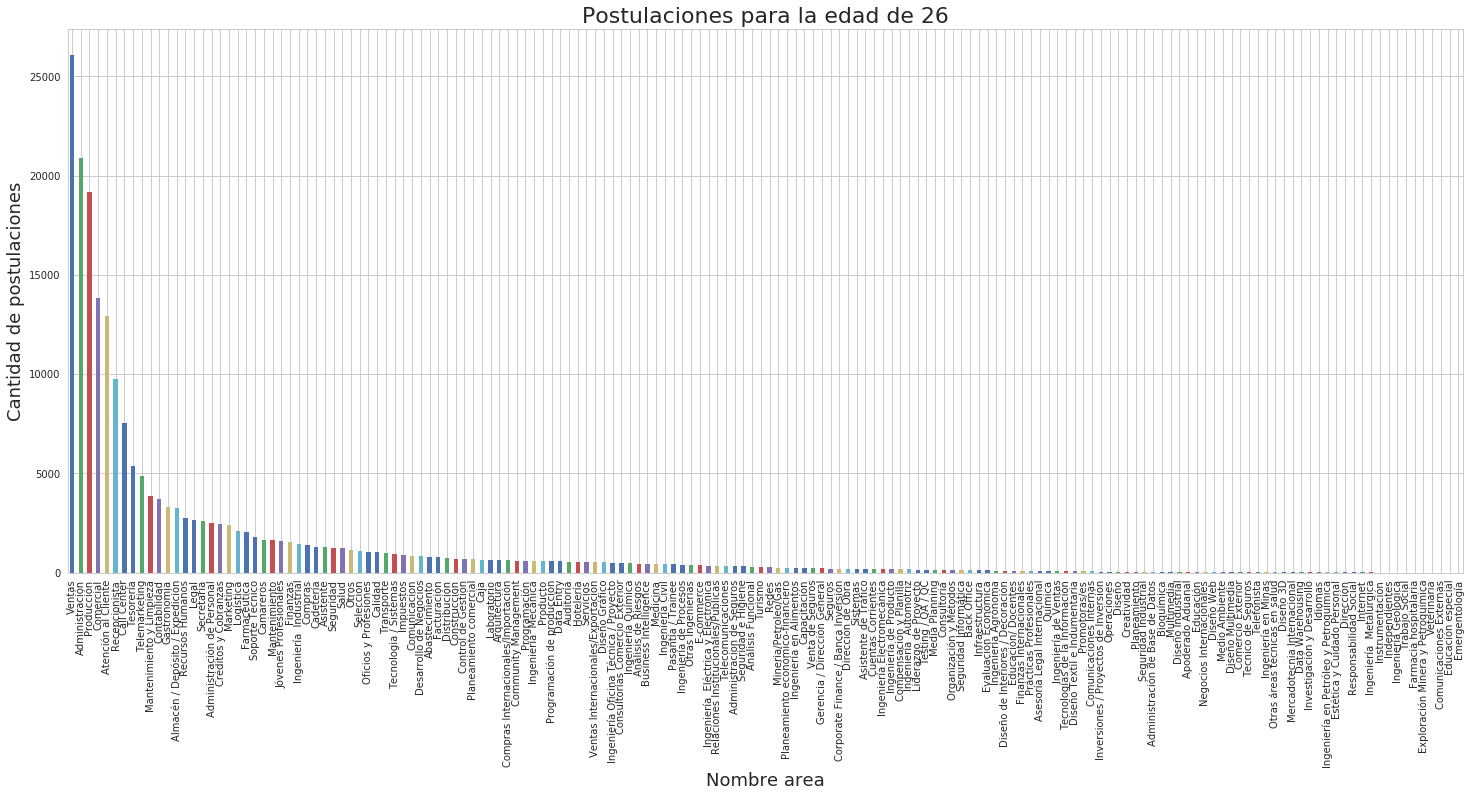

In [39]:
g = prueba_fin.plot.bar(figsize=(25,10))
g.set_title("Postulaciones para la edad de 26", fontsize=22)
g.set_xlabel("Nombre area",fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

In [40]:
avisos_vistos = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_3_vistas.csv',low_memory=False)

In [41]:
avisos_vistos.head(4)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv


In [42]:
avisos_vistos = avisos_vistos.rename(columns={"idAviso": "idaviso"})

In [43]:
avisos_vistos_26 = avisos_vistos.loc[avisos_vistos['idpostulante'].isin(prueba['idpostulante'])]

In [44]:
prueba3 = pd.merge(avisos_vistos_26, avisos_det[['idaviso','nombre_area']], on='idaviso', how='inner')

In [45]:
prueba3.head(3)

,idaviso,timestamp,idpostulante,nombre_area
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,Programación de producción
1,1111780242,2018-02-23T14:00:58.249-0500,KBdJJKd,Programación de producción
2,1111780242,2018-02-23T15:30:14.817-0500,96XY1Ea,Programación de producción


In [46]:
prueba_visto= prueba3.groupby('nombre_area').size().reset_index(name='counts') #probado funciona bien

In [47]:
prueba_visto.head(4)

,nombre_area,counts
0,Abastecimiento,157
1,Administracion de Seguros,118
2,Administración,6322
3,Administración de Base de Datos,9


In [48]:
prueba_post = prueba.groupby('nombre_area').size().reset_index(name='counts') #probado funciona bien

In [49]:
prueba_post.head(4)

,nombre_area,counts
0,Abastecimiento,787
1,Administracion de Seguros,323
2,Administración,20870
3,Administración de Base de Datos,41


In [50]:
prueba5 = pd.merge(prueba_post, prueba_visto, on='nombre_area', how='inner')

In [51]:
prueba5.head(4)

,nombre_area,counts_x,counts_y
0,Abastecimiento,787,157
1,Administracion de Seguros,323,118
2,Administración,20870,6322
3,Administración de Base de Datos,41,9


In [52]:
prueba5['count'] = prueba5.apply(lambda row: row.counts_x + row.counts_y, axis=1)

In [53]:
del prueba5['counts_x']
del prueba5['counts_y']

In [54]:
prueba5.head(4)

,nombre_area,count
0,Abastecimiento,944
1,Administracion de Seguros,441
2,Administración,27192
3,Administración de Base de Datos,50


In [55]:
prueba5 =prueba5.set_index('nombre_area').sort_values(by='count',ascending=False)

In [56]:
#del prueba5.index.name

Text(0,0.5,'Cantidad de avisos vistos o postulados')

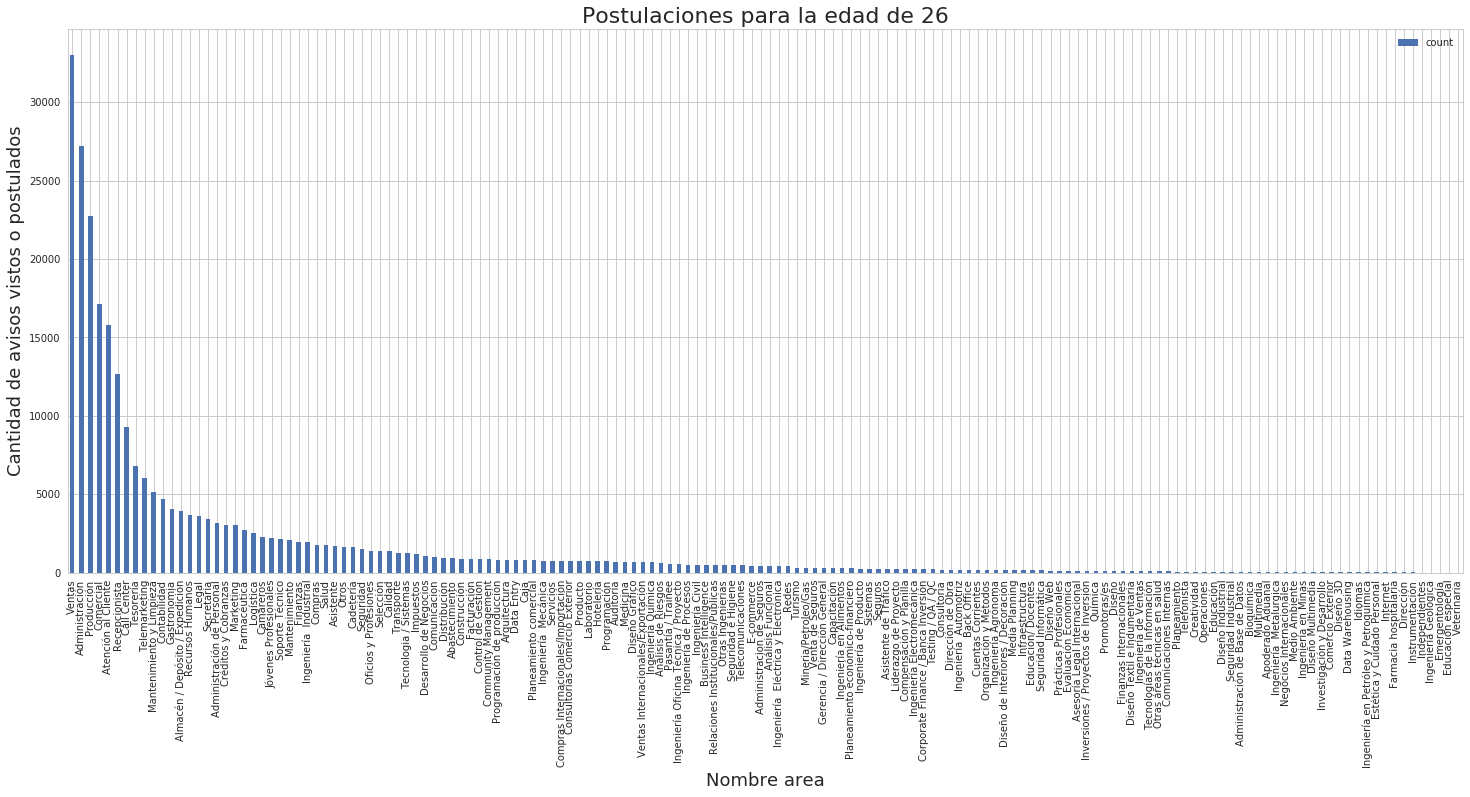

In [57]:
g = prueba5.plot.bar(figsize=(25,10))
g.set_title("Postulaciones para la edad de 26", fontsize=22)
g.set_xlabel("Nombre area",fontsize=18)
g.set_ylabel("Cantidad de avisos vistos o postulados", fontsize=18)

La idea ahora sería, yo me postule al aviso 1112257047 y me interesaría tener recomendaciones de otros avisos similares a los que otras personas que se hayan postulado a este. Entonces se traeran todos los avisos de los que se postularon al 1112257047 siendo todos del mismo area.

In [58]:
aviso_post_yo_y_otros = postulaciones.loc[postulaciones['idaviso'] == 1112257047] #supongo

In [59]:
lista_otros_postulantes = aviso_post_yo_y_otros['idpostulante'].tolist()

In [60]:
lista_otros_postulantes.remove('NM5M') #supongo ese mi idpostulante

In [61]:
df_a_l = (postulaciones.loc[postulaciones['idpostulante'].isin(lista_otros_postulantes)])['idaviso'].tolist()

In [62]:
df_a_l.remove(1112257047)

In [63]:
df_o_l = (avisos_vistos.loc[avisos_vistos['idpostulante'].isin(lista_otros_postulantes)])['idaviso']

In [64]:
df_lista = pd.DataFrame({'idaviso':df_o_l})

In [65]:
df_lista2 = pd.DataFrame({'idaviso':df_a_l})

In [66]:
df_final = pd.merge(df_lista2, df_lista, on='idaviso', how='outer')

In [67]:
df_final.drop_duplicates(inplace=True)

In [68]:
lista_avisos_recomendar = df_final['idaviso'].tolist()

In [69]:
nomb_area_deseado = ((avisos_det.loc[avisos_det['idaviso'] == 1112257047])['nombre_area'].tolist())[0]

In [70]:
print(nomb_area_deseado)

Atención al Cliente


In [71]:
avisos_a_recom =  (avisos_det.loc[avisos_det['idaviso'].isin(lista_avisos_recomendar)]).loc[avisos_det['nombre_area']==nomb_area_deseado] 

In [72]:
avisos_online = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_5_avisos_online.csv',low_memory=False)

In [73]:
avisos_a_recom = pd.merge(avisos_a_recom, avisos_online, on='idaviso', how='inner') # los avisos a recomendar unicamente serían los avisos online.

In [74]:
avisos_a_recom.head(5)                #avisos online a recomendar segun una postulacion de un usuario..

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1111961482,1,Analista de Clientes Corporativos,"<p> </p><p> </p><p> </p><p> </p><p style=""""><s...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Atención al Cliente,ADT Security Services
1,1112215212,1,ASESORES DE ATENCIÓN AL CLIENTE (ZONA LUJAN y ...,<p>Importante cadena de retail del mercado de ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Natural Life
2,1112282241,1,Representante de Atención al Cliente con Ingle...,<p>¡En Universal Assistance queremos conocerte...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Universal Assistance
3,1112342544,1,Atención al cliente,<p>Importante hipermercado se encuentra en la ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Atención al Cliente,Grupo Gestión
4,1112343237,1,Repositores EVENTUALES sexo masculino Z/ V. L...,<p>Importante Cadena de Retails se encuentra e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Atención al Cliente,Suministra


In [75]:
post_validas2 = post_validas.copy()

In [76]:
post_validas2 = post_validas[post_validas['age'] >= 18]

In [77]:
post_validas2 = post_validas2[post_validas2.age <= 65]

In [78]:
post_validas2.head(4)

,idaviso,idpostulante,fechapostulacion,age
0,1112257047,NM5M,2018-01-15 16:22:34,47
1,1111920714,NM5M,2018-02-06 09:04:50,47
2,1112346945,NM5M,2018-02-22 09:04:47,47
3,1112345547,NM5M,2018-02-22 09:04:59,47


In [79]:
df_g = post_validas2.copy()

In [80]:
result_group= df_g.groupby(['idaviso','age']).size().reset_index(name='counts') #probado funciona bien

In [81]:
result_group.head(4)

,idaviso,age,counts
0,8725750,19,4
1,8725750,20,4
2,8725750,21,2
3,8725750,22,10


In [82]:
avisos_det = pd.read_csv('/home/alejandro/Desktop/datos_navent_fiuba/fiuba_6_avisos_detalle.csv',low_memory=False)

In [83]:
df_result = result_group.merge(avisos_det[['idaviso','nombre_area']])

In [84]:
del df_result['idaviso']

hasta aca lo que tengo en fg_result es segun la edad la cantidad de postulaciones a avisos de un tipo de area

In [85]:
aux = df_result.groupby(['nombre_area','age']).sum()

In [86]:
aux.head(4)

counts
nombre_area    age        
Abastecimiento 18      173
               19      369
               20      548
               21      643

In [87]:
datos_heat_map = aux.unstack(fill_value=0)

In [88]:
(datos_heat_map.shape)[0]

163

In [89]:
datos_heat_map.head(8)

counts                                   \
age                                 18    19    20     21     22     23   
nombre_area                                                               
Abastecimiento                     173   369   548    643    721    711   
Administracion de Seguros           32    66   127    181    205    282   
Administración                    1851  5297  8685  12984  15748  18921   
Administración de Base de Datos      3     8    19     18     19     21   
Administración de Personal         282   645  1026   1674   2019   2411   
Almacén / Depósito / Expedición    502  1191  1782   2425   2881   3011   
Análisis Funcional                  14    65    82    130    198    240   
Análisis de Riesgos                  6    45    88    159    233    296   

                                                            ...            \
age                                 24     25     26     27 ...   56   57   
nombre_area                                                 ...             
Abastecimiento                     734    660    787    682 ...    7    9   
Administracion de Seguros          276    310    323    294 ...    4    2   
Administración                   20892  21022  20870  20424 ...  621  308   
Administración de Base de Datos     28     38     41     41 ...    0    1   
Administración de Personal        2691   2476   2487   2648 ...   51   52   
Almacén / Depósito / Expedición   3120   3191   3267   3375 ...   64   41   
Análisis Funcional                 341    294    311    439 ...    7   26   
Análisis de Riesgos                435    437    456    505 ...    4    9   

                                                                    
age                               58   59   60  61  62  63  64  65  
nombre_area                                                         
Abastecimiento                     6    8    2   0   2   1   2   0  
Administracion de Seguros          3    2    1   0   1   0   0   0  
Administración                   423  150  177  94  80  34  35   6  
Administración de Base de Datos    0    0    0   1   0   0   0   0  
Administración de Personal        27   27    9  12   8   2  11  11  
Almacén / Depósito / Expedición   26   27   10  22  10   6  13   0  
Análisis Funcional                14    8    4  38   2   0   0   0  
Análisis de Riesgos                9    2   20   0   0   0   0   0  

[8 rows x 48 columns]

In [90]:
datos_heat_map.columns = datos_heat_map.columns.droplevel(0)

In [91]:
val=False
i=0
while not (i==(((datos_heat_map.shape)[0]))):
    for col in datos_heat_map.columns:
        if(((datos_heat_map.iloc[i])[col])>4000):
            val=True
    if not val:
        datos_heat_map.drop(datos_heat_map.index[i], inplace=True)
        if not i==0:
            i=i-1
        val=False
        continue
    val=False
    i = i+1

Text(114,0.5,'Categoría')

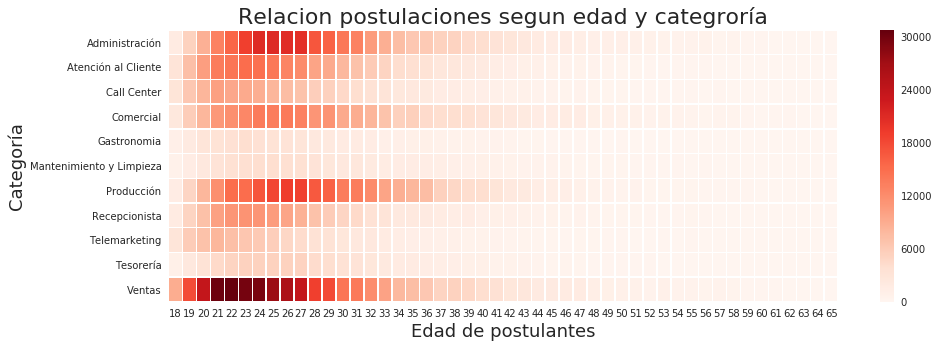

In [92]:
fig, ax = plt.subplots(figsize=(15,5))
g = sns.heatmap(datos_heat_map,  cmap="Reds",ax=ax,linewidths=.5)
g.set_title("Relacion postulaciones segun edad y categroría", fontsize=22)
g.set_xlabel("Edad de postulantes",fontsize=18)
g.set_ylabel("Categoría", fontsize=18)

In [93]:
fechas_validas_copy = fechas_validas.copy()

In [94]:
fechas_validas_copy['fechapostulacion'] = pd.to_datetime(fechas_validas_copy['fechapostulacion'])

In [95]:
fechas_validas_copy.head(3)

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,age
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,47
1,1111920714,NM5M,2018-02-06 09:04:50,1970-12-03,FEM,47
2,1112346945,NM5M,2018-02-22 09:04:47,1970-12-03,FEM,47


In [96]:
fechas_validas_copy['dia_semana'] = fechas_validas_copy['fechapostulacion'].dt.weekday_name

In [97]:
fechas_validas_copy['mes'] = fechas_validas_copy['fechapostulacion'].dt.month

In [98]:
#convertir numero mes en nombre mes:
import calendar
fechas_validas_copy['mes'] = fechas_validas_copy['mes'].apply(lambda x: calendar.month_abbr[x])

In [99]:
fechas_validas_copy['dia'] = fechas_validas_copy['fechapostulacion'].dt.day

In [124]:
df_dias_semana = (fechas_validas_copy.groupby('dia_semana').size().reset_index(name='cantidad'))

In [125]:
d = {'dia_semana': ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]}
df = pd.DataFrame(data=d)

In [129]:
df_dias_semana = pd.merge(df, df_dias_semana, on='dia_semana', how='left')

In [140]:
df_dias_semana = df_dias_semana.set_index('dia_semana')

In [141]:
del df_dias_semana.index.name

In [142]:
df_dias_semana

,cantidad
Monday,659598
Tuesday,650157
Wednesday,668725
Thursday,499641
Friday,440921
Saturday,214285
Sunday,223794


Text(0,0.5,'Cantidad de postulaciones')

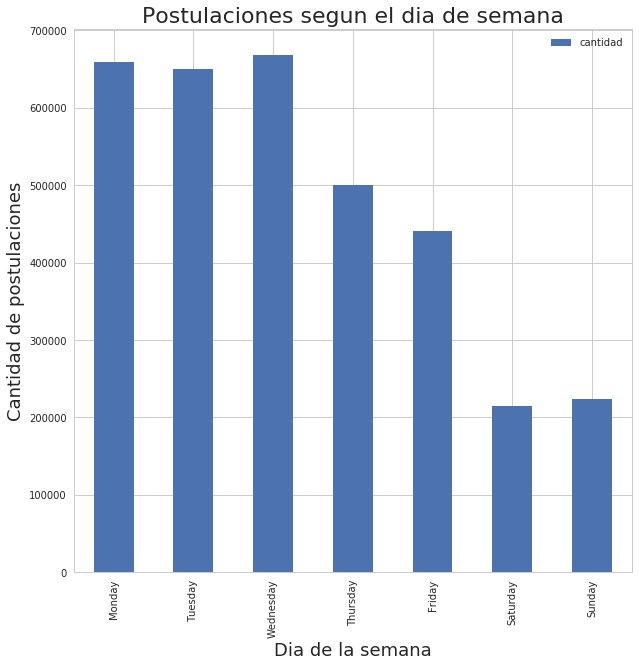

In [143]:
g = df_dias_semana.plot.bar(figsize=(10,10))
g.set_title("Postulaciones segun el dia de semana", fontsize=22)
g.set_xlabel("Dia de la semana",fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

In [147]:
df_dias = fechas_validas_copy.groupby('dia').size()

Text(0,0.5,'Cantidad de postulaciones')

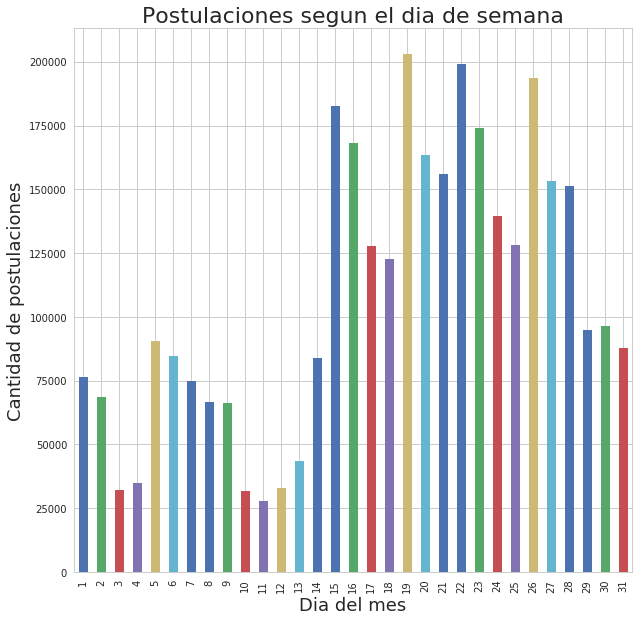

In [150]:
g = df_dias.plot.bar(figsize=(10,10))
g.set_title("Postulaciones segun el dia de semana", fontsize=22)
g.set_xlabel("Dia del mes",fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

In [151]:
df_mes = fechas_validas_copy.groupby('mes').size()

Text(0,0.5,'Cantidad de postulaciones')

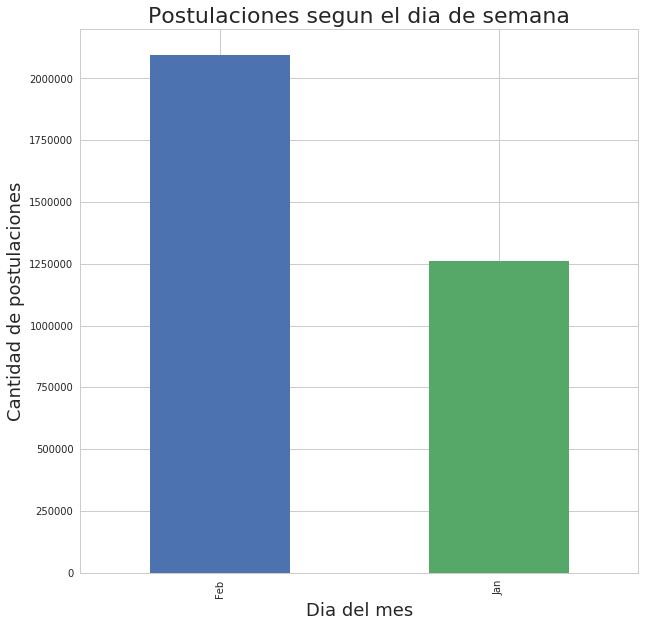

In [154]:
g = df_mes.plot.bar(figsize=(10,10))
g.set_title("Postulaciones segun el dia de semana", fontsize=22)
g.set_xlabel("Dia del mes",fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)